In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Análise Exploratória

### Carregar e visualizar as primeiras linhas dos dados

In [2]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")
laptop_price.head()

,company,product,typename,inches,screen_resolution,cpu,ram(gb),memory_total(gb),gpu,opsys,weight(kg),price_euros,storage_type
0,Apple,MacBook Pro,Ultrabook,13,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.370117,1340.0,SSD
1,Apple,Macbook Air,Ultrabook,13,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.339844,899.0,Flash Storage
2,HP,250 G6,Notebook,15,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.860352,575.0,SSD
3,Apple,MacBook Pro,Ultrabook,15,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.830078,2538.0,SSD
4,Apple,MacBook Pro,Ultrabook,13,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.370117,1804.0,SSD


### Verificar quantidade de valores únicos

In [3]:
print("Quantidade de Valores únicos por coluna")
for column in laptop_price.columns:
    print(f"{column}: {len(laptop_price[column].unique())}")

Quantidade de Valores únicos por coluna
company: 19
product: 618
typename: 6
inches: 8
screen_resolution: 40
cpu: 118
ram(gb): 9
memory_total(gb): 23
gpu: 110
opsys: 9
weight(kg): 171
price_euros: 717
storage_type: 7


### Função para criar gráfico de barra de média de preço

In [4]:
def create_bar(x, x_label, rotation=0):
    df_groupred = laptop_price.groupby(by=x, as_index=False)['price_euros'].mean()

    fig = plt.figure(figsize=(16, 6))
    sns.barplot(x=x, y='price_euros', data=df_groupred)
    plt.xlabel(x_label, fontsize='large', family='monospace')
    plt.ylabel("Preço (€)", fontsize='large',family='monospace')
    plt.xticks(rotation=rotation, size=12)
    plt.yticks(size=12)

    plt.title(f"Média de Preço dos Notebooks por {x_label.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
    plt.show() 

### Verificar média de preço por marca

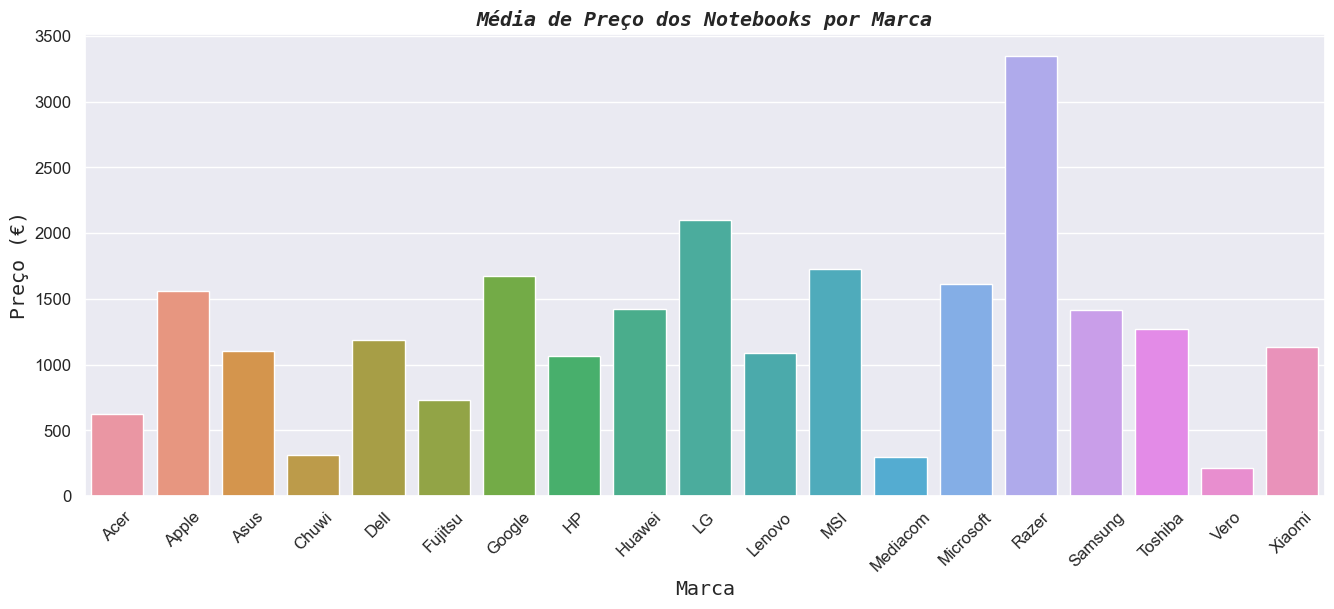

In [5]:
create_bar('company', 'Marca', 45)

### Verificar média de preço por tipo

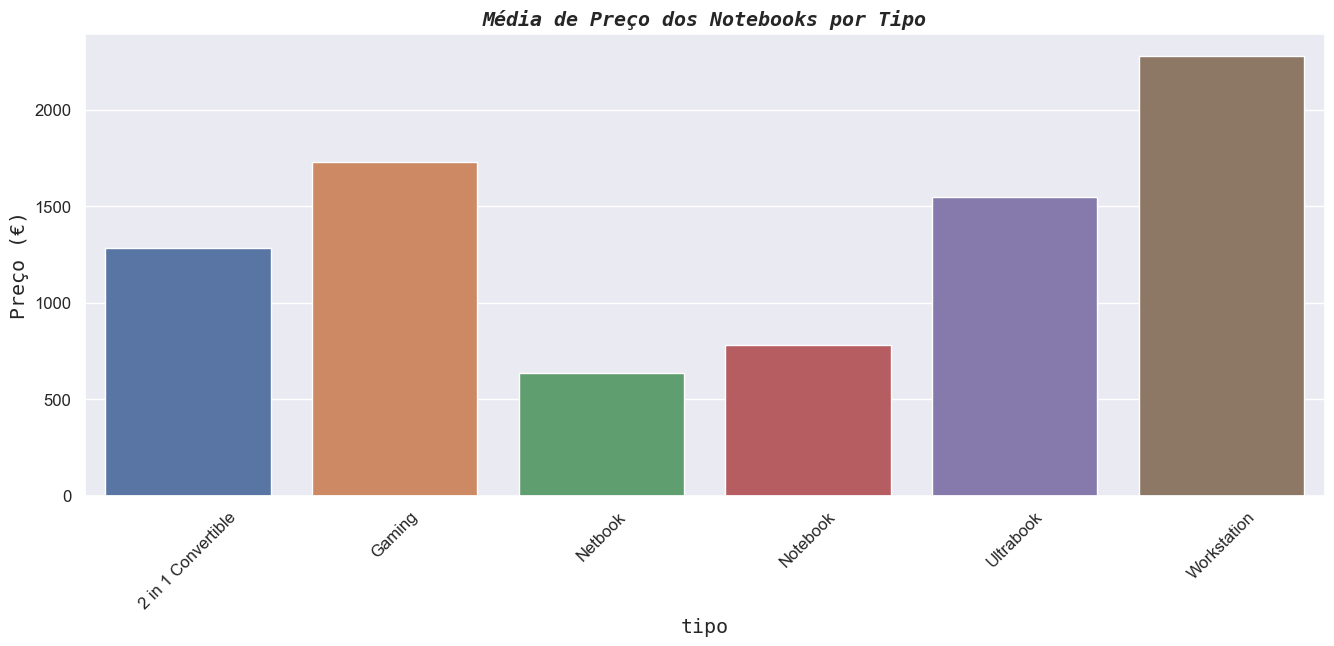

In [6]:
create_bar('typename', 'tipo', 45)

### Verificar média de preço por quantidade de ram

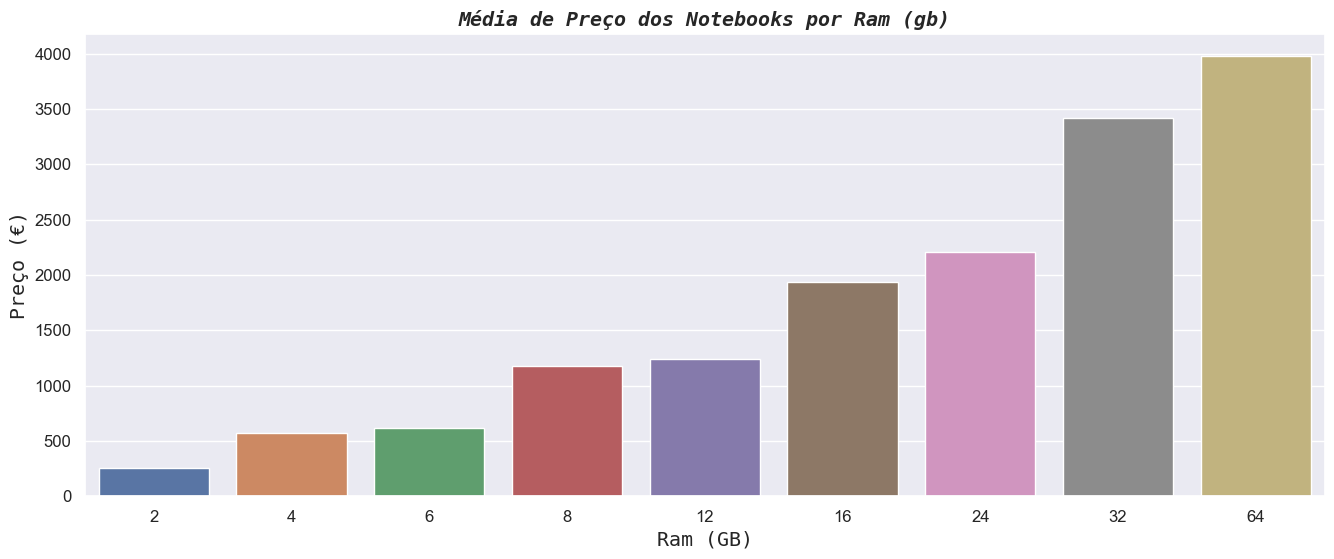

In [7]:
create_bar('ram(gb)', 'Ram (GB)', 0)

### Verificar média de preço por sistema operacional

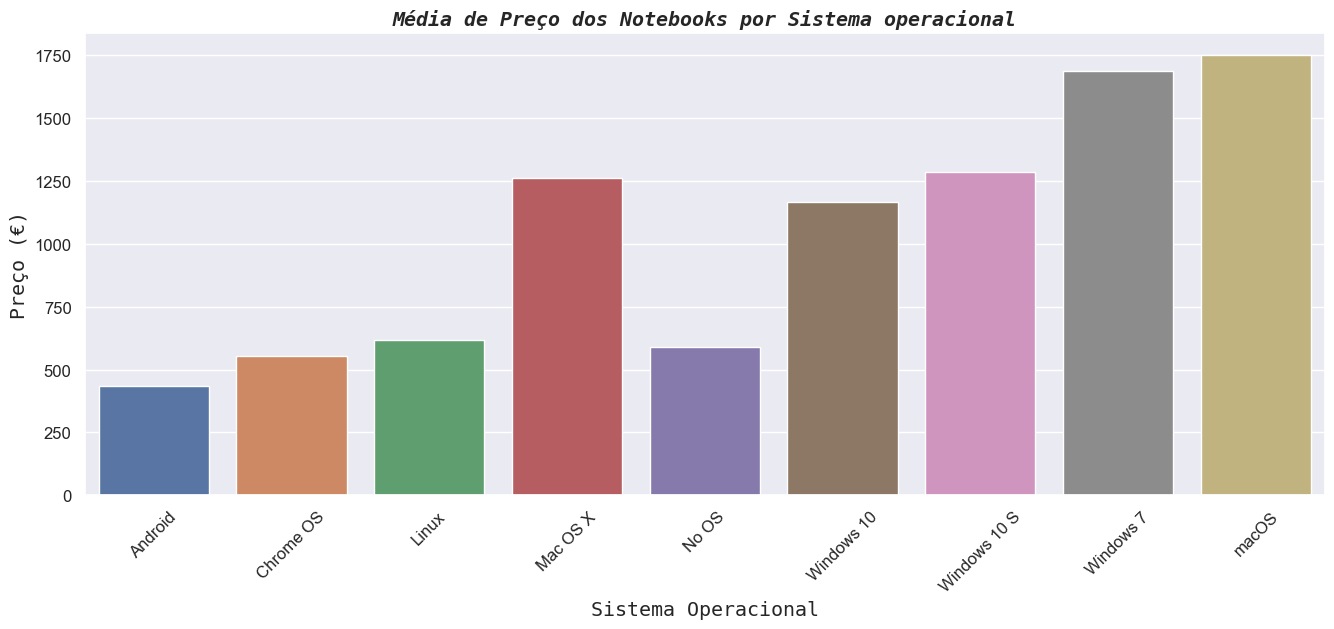

In [8]:
create_bar('opsys', 'Sistema Operacional', 45)

### Verificar média de preço por quantidade de armazenamento

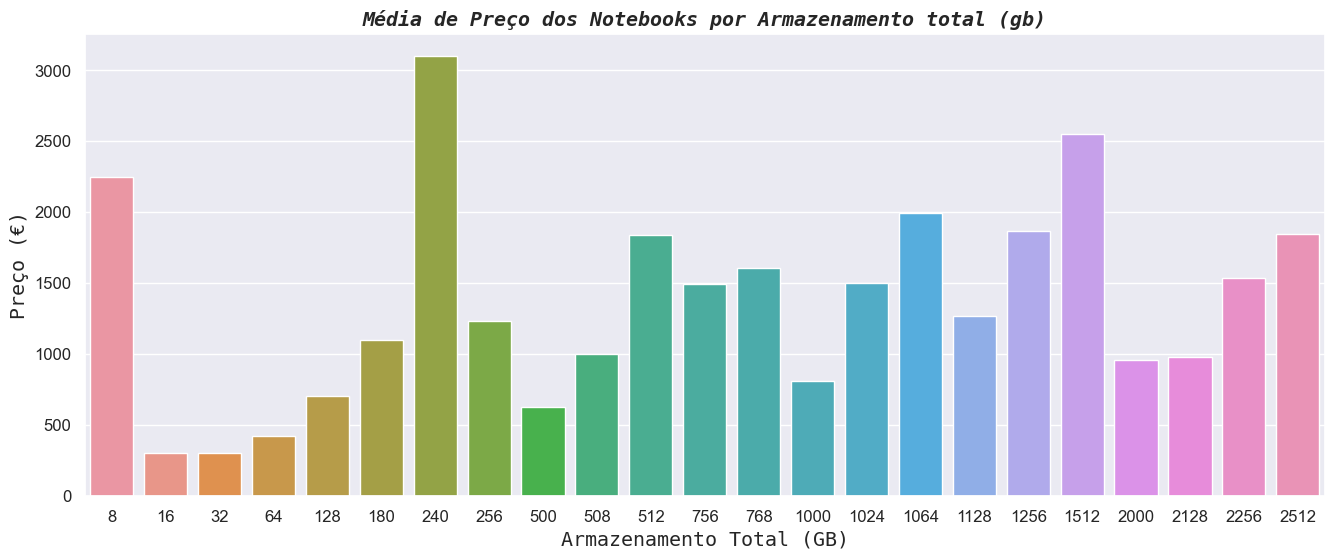

In [9]:
create_bar('memory_total(gb)', 'Armazenamento Total (GB)', 0)

### Verificar média de preço por tipo de armazenamento

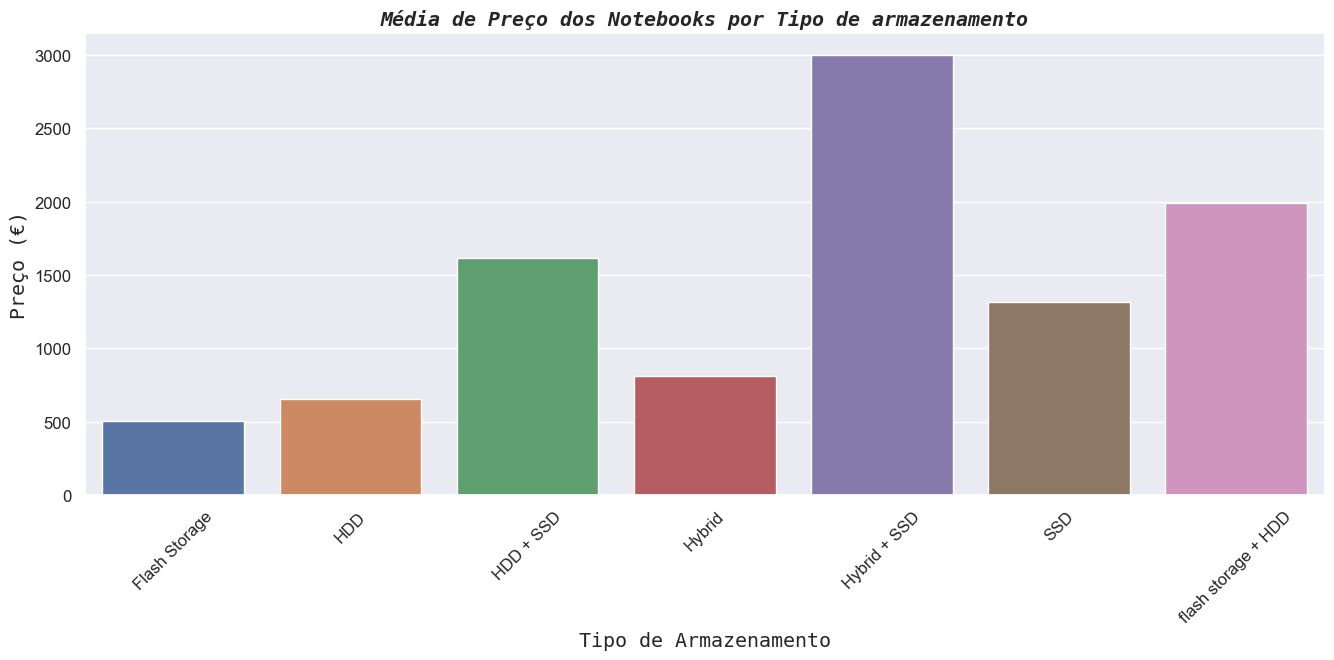

In [10]:
create_bar('storage_type', 'Tipo de Armazenamento', 45)

### Verificar média de preço por polegadas

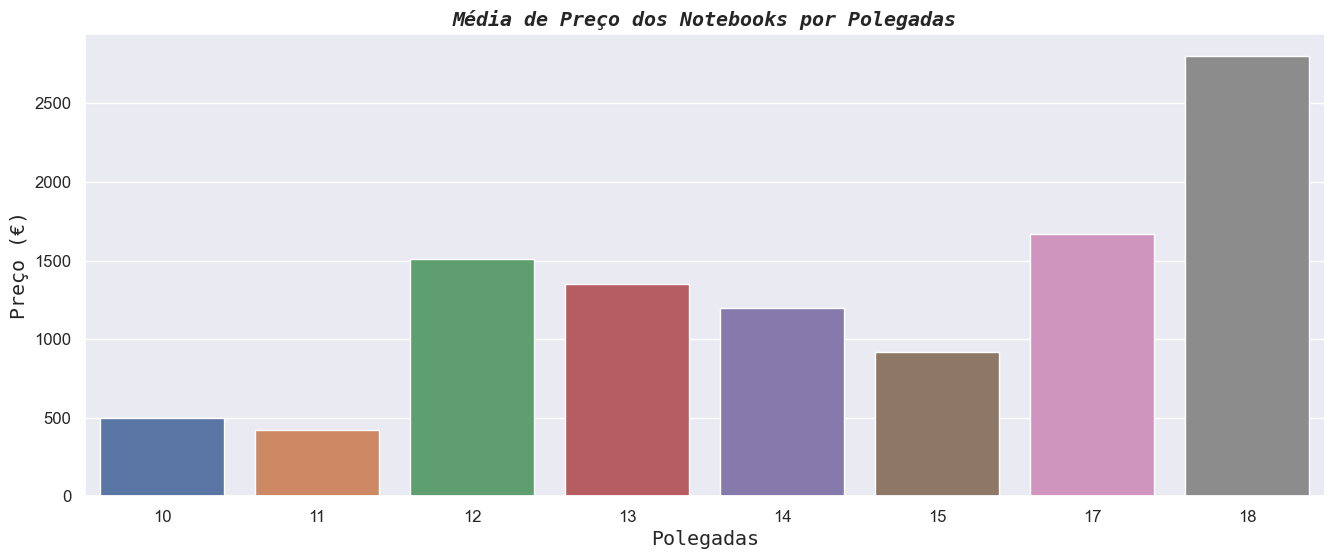

In [11]:
create_bar('inches', 'Polegadas', 0)

### Verificar média de preço por resolução da tela

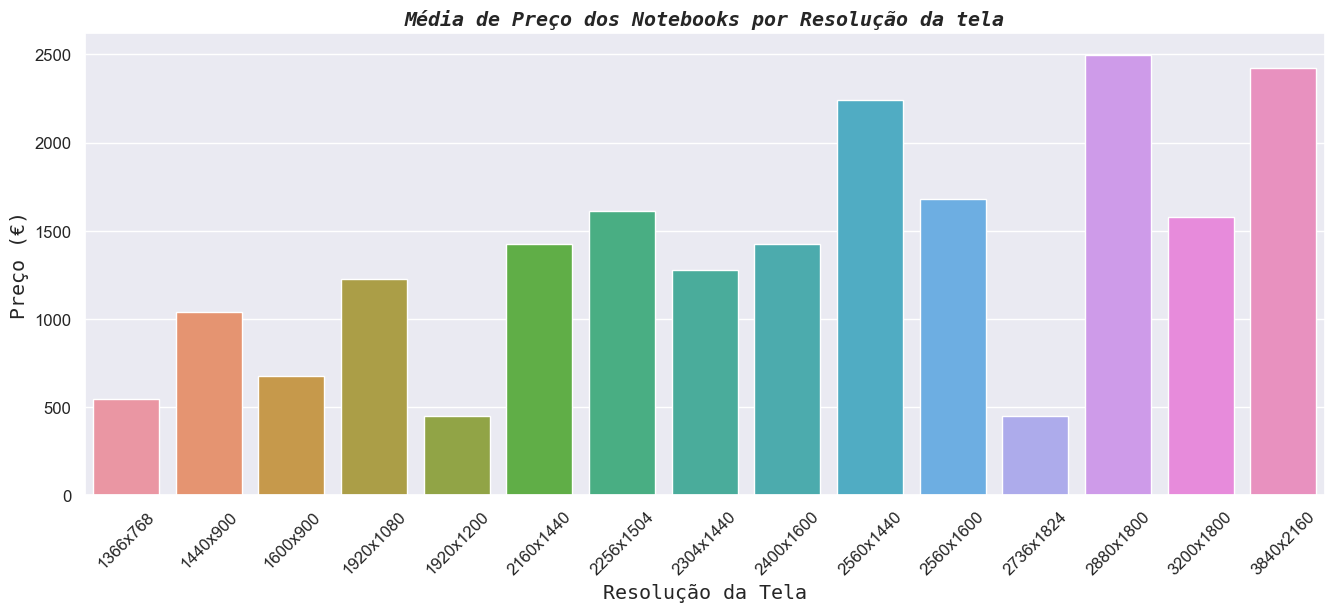

In [12]:
def filter_resolution(row):
    row_processed = row.split()
    
    if len(row_processed) > 1:
        row_processed = row_processed[len(row_processed) - 1]
    else:
        row_processed = row_processed[0]

    return row_processed

laptop_price['screen_resolution'] = laptop_price['screen_resolution'].apply(filter_resolution)
create_bar('screen_resolution', 'Resolução da Tela', 45)